In [1]:
import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import random
from polar_quadtree import PolarNode, PolarQuadTree

In [2]:
# Generate points inside Poincaré disk
points = []
num_points = 100

random.seed(42)
while len(points) != num_points:
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    
    # Test if point is inside Poincaré disk,
    # but not on the boundary.
    if x**2 + y**2 < 0.9:
        points.append((x, y))

points = np.array(points)

In [3]:
tree = PolarQuadTree.from_cartesian_points(points)

print(f"Number of children of root node: {len(tree.root.children)}")
print(tree.root)
for node in tree.root.children:
    print(len(node.children))
    print(node)

Number of children of root node: 4
Radius range: [0.1111999776522225, 0.9368657871583865]; Angle range: [0.0, 6.283185307179586]
4
Radius range: [0.6783665602624266, 0.9368657871583865]; Angle range: [0.0, 3.141592653589793]
4
Radius range: [0.6783665602624266, 0.9368657871583865]; Angle range: [3.141592653589793, 6.283185307179586]
4
Radius range: [0.1111999776522225, 0.6783665602624266]; Angle range: [3.141592653589793, 6.283185307179586]
4
Radius range: [0.1111999776522225, 0.6783665602624266]; Angle range: [0.0, 3.141592653589793]


In [4]:
#tree.traverse()
print(len(tree.root.points))
print(len(set(tree.root.points)))

100
100


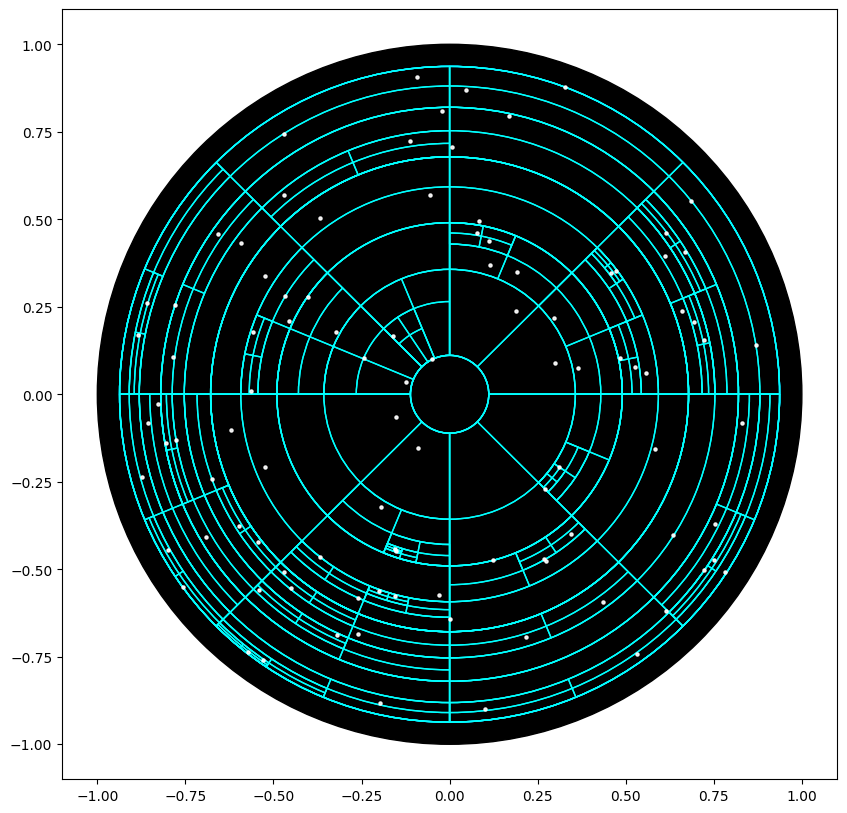

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Draw Poincaré disk
poincare_boundary = plt.Circle((0, 0), 1.0, color='black')
inner_circle = plt.Circle((0, 0), tree.root.min_r, color='purple', fill=False)
outer_circle = plt.Circle((0, 0), tree.root.max_r, color='blue', fill=False)

ax.add_patch(poincare_boundary)
ax.add_patch(inner_circle)
ax.add_patch(outer_circle)
tree.render(ax)

ax.scatter(
    x=[points[:, 0]],
    y=[points[:, 1]],
    marker='o', alpha=0.9, color='white', s=5.0)